## Exploring CorEx on Recipe Topic Generation

Guide [here](https://github.com/gregversteeg/corex_topic/blob/master/corextopic/example/corex_topic_example.ipynb)



In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as ss
import matplotlib.pyplot as plt

import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [28]:
df = pd.read_csv('Recipe_Recommendation/dataset/Recipe_sample_dataset_small.csv')

In [3]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [4]:
df.head()

,title,ingredients,directions,link,source,NER
0,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]"
1,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p..."
2,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd..."
3,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus..."
4,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne..."


In [5]:
df['directions']=[x[2:-2] for x in df['directions']]

In [6]:
# Transform data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(df['directions'])
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

(22311, 14199)

In [7]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names()))

In [8]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(22311, 13830)

In [14]:
topic_model = ct.Corex(n_hidden=50, words=words, max_iter=200, verbose=False)
topic_model.fit(doc_word, words=words);

In [15]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: pepper, garlic, onion, season, onions, tomatoes, parsley, green, tomato, celery
1: use, like, little, sure, want, bit, turn, start, need, making
2: sugar, vanilla, beat, egg, soda, cream, chocolate, sift, whites, yolks
3: bake, u00b0, baking, minutes, greased, inch, dish, spread, pans, loaf
4: bring, boil, simmer, water, saucepan, pot, boiling, thickened, dutch, cold
5: oven, preheat, degrees, u00b0f, preheated, golden, prepared, grease, evenly, 350f
6: mixer, dough, speed, electric, knead, floured, yeast, rise, form, fluffy
7: cook, skillet, tender, drain, saute, sauce, broth, beef, brown, mushrooms
8: oil, olive, cooked, fry, red, grill, fish, soy, frying, wine
9: surface, edges, lightly, pastry, filling, press, work, line, cutter, edge
10: sheet, cookie, roll, balls, shape, sheets, drop, ball, cookies, apart
11: juice, lemon, processor, food, zest, lime, process, blender, orange, puree
12: ice, glass, glasses, strain, freeze, pitcher, freezer, garnish, shaker, chilled
13: cut, wr

In [11]:
topic_model.tc

13.915259073731116

In [12]:
topic_model.tcs

array([1.62839616, 1.27621604, 1.21558295, 1.18628812, 0.95716013,
       0.82787045, 0.80587158, 0.69666544, 0.56629242, 0.54968984,
       0.53344036, 0.51981236, 0.51771778, 0.50175677, 0.42184744,
       0.41633109, 0.35711867, 0.34798408, 0.30307219, 0.28614519])

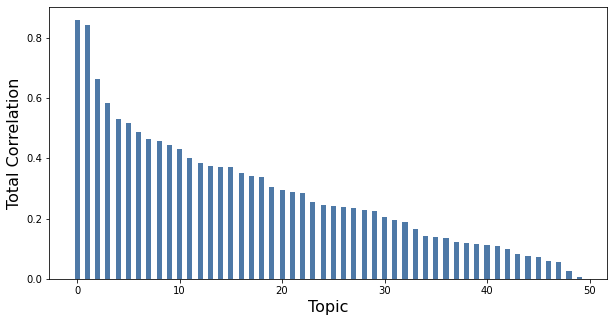

In [17]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation', fontsize=16);
plt.savefig('corex_topic_v_tcs.png')

#### Notes:

Below we create the mapping to identify which topics are mapped to which topics. It should be noted CorEx does not require singular assignment, meaning a single document can be assigned to no topics or to many/all.

In [41]:
topic_model.p_y_given_x[0]

array([4.68607284e-03, 2.22892458e-04, 4.50886980e-03, 2.15917659e-03,
       6.54568561e-01, 7.45516621e-04, 8.07082866e-04, 6.05584606e-03,
       3.30822983e-03, 6.17281504e-04, 3.74658614e-03, 3.44204714e-02,
       1.80560602e-04, 4.91067755e-03, 5.16756831e-03, 5.38142476e-03,
       1.92684410e-03, 3.17510885e-03, 2.05669483e-03, 9.99999000e-01,
       3.55882995e-03, 8.69522141e-05, 6.24626952e-03, 2.17039032e-03,
       8.60816853e-03, 9.99999000e-01, 5.94362061e-03, 1.05898078e-03,
       9.82199698e-03, 4.54815802e-03, 8.21130791e-03, 1.40045717e-01,
       7.49837452e-03, 3.04309904e-03, 1.84928081e-04, 1.15275052e-02,
       2.55479696e-01, 9.70888105e-03, 8.09492028e-03, 1.61751457e-02,
       8.71166875e-04, 1.52393433e-02, 3.17376913e-02, 7.08628299e-01,
       5.33740301e-01, 1.26861626e-03, 3.72586928e-05, 1.77753383e-02,
       3.97017567e-02, 6.17885372e-02])

In [68]:
# creating document to topic mapping

df_corex = pd.DataFrame(columns=['doc_id','topic_num'])

for idx in range(0,len(topic_model.p_y_given_x)):
    
    for i in np.where(topic_model.p_y_given_x[idx]==topic_model.p_y_given_x[idx].max()):
        
        for l in range(0,len(np.where(topic_model.p_y_given_x[idx]==topic_model.p_y_given_x[idx].max())[0])):
            
            new_row = {'doc_id':idx,'topic_num':i[l]}
        
            df_corex=df_corex.append(new_row, ignore_index=True)

In [75]:
df_corex_research = pd.DataFrame(columns=['doc_id','num_topics'])

for idx in range(0,len(topic_model.labels)):
    new_row={'doc_id':idx,'num_topics':sum(topic_model.labels[idx])}
    df_corex_research = df_corex_research.append(new_row, ignore_index=True)    
#     for i in np.where(topic_model.p_y_given_x[idx]==topic_model.p_y_given_x[idx].max()):
        

In [77]:
len(df[df_corex_research['num_topics']==0])

357

In [79]:
max(df_corex_research['num_topics'])

37

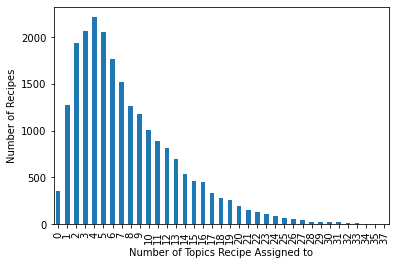

In [97]:
#Demonstrating the distribution of number of topics each document assigned to
df_corex_research['num_topics'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel("Number of Topics Recipe Assigned to")
plt.ylabel("Number of Recipes")
plt.savefig('topics_per_recipe_corex.png')

In [54]:
for i in np.where(topic_model.p_y_given_x[22310]==topic_model.p_y_given_x[22310].max()):
    for l in range(0,len(np.where(topic_model.p_y_given_x[22310]==topic_model.p_y_given_x[22310].max())))
    print(i[0])

0


In [63]:
len(np.where(topic_model.p_y_given_x[22310]==topic_model.p_y_given_x[22310].max())[0])

4

In [50]:
for i in np.where(topic_model.labels[22310]==True):
    
    print(i)

[ 0  1  7  8 11 13 14 24 25 27 28 29 36 39 41 42 44]


In [51]:
topic_model.labels[22310]

array([ True,  True, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False])

In [69]:
df_corex[df_corex['doc_id']==22310]

,doc_id,topic_num
43642,22310,0
43643,22310,8
43644,22310,25
43645,22310,27


In [70]:
len(df_corex)

43646

In [71]:
df_corex.to_csv('corex_doc_to_topic.csv')

In [42]:
len(topic_model.labels)

22311

#### Notes:

Trying 10 topics

In [24]:
topic_model10 = ct.Corex(n_hidden=10, words=words, max_iter=200, verbose=False, seed=1)
topic_model10.fit(doc_word, words=words);

In [25]:
# Print all topics from the CorEx topic model
topics10 = topic_model10.get_topics()
for n,topic in enumerate(topics10):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: sugar, onion, vanilla, chicken, baking, flour, soda, green, chocolate, cheese
1: cup, tablespoons, teaspoon, tsp, cups, tbsp, tablespoon, teaspoons, ounces, oz
2: pepper, garlic, minced, black, ground, cloves, salt, tomatoes, sauce, chopped
3: olive, oil, fresh, virgin, freshly, extra, kosher, dried, cilantro, thyme
4: cut, leaves, bay, wine, leaf, inch, soy, pieces, sesame, stock
5: red, vinegar, butter, milk, beans, eggs, chili, mustard, peppers, melted
6: whip, pie, cool, pudding, graham, mix, whipped, cream, crust, cracker
7: purpose, room, temperature, packed, unsalted, brown, oats, granulated, firmly, yeast
8: juice, lemon, orange, lime, fat, low, zest, sodium, yogurt, reduced
9: thinly, sliced, peeled, large, spray, quartered, squash, vegetable, yellow, cored


In [26]:
topic_model10.tc

7.993253174446666

#### Notes:

Trying hierarchical

In [47]:
topic_model3 = ct.Corex(n_hidden=10, words=words)
topic_model3.fit(doc_word, words=words, anchors=[['sugar','soda','flour','powder','vanilla'],'tofu',\
                                                 ['chicken','beef','pork','seafood','shrimp','crab','fish']],\
                 anchor_strength=2);

In [48]:
topic_model3.tc

9.457210363725316

In [49]:
# Print all topics from the CorEx topic model
topics3 = topic_model3.get_topics()
for n,topic in enumerate(topics3):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: sugar, vanilla, flour, soda, baking, pepper, eggs, extract, powder, butter
1: olive, oil, fresh, red, black, cloves, virgin, freshly, leaves, extra
2: chicken, beef, garlic, sauce, pork, broth, minced, shrimp, ground, lb
3: fat, low, free, sodium, spray, reduced, cooking, use, recipe, follows
4: onion, green, chopped, tomatoes, sliced, onions, diced, celery, tomato, medium
5: whip, salt, cool, pudding, graham, mix, cake, whipped, cream, pineapple
6: juice, lemon, orange, lime, zest, rind, peel, juiced, mint, apple
7: cheese, cheddar, parmesan, shredded, grated, mozzarella, sharp, dressing, italian, jack
8: parsley, thyme, dried, leaf, bay, dijon, mustard, basil, flat, dill
9: cup, tablespoons, teaspoon, tsp, cups, tablespoon, tbsp, teaspoons, ounces, oz
